In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
# import plotly.figure_factory as ff
# import seaborn as sns
# import plotly.express as px

In [2]:
BLINE_DIR = '20 bin PPO 500 results/'
ATLA_DIR = 'PPO agent 100 alts over 1000+200 2-3-21 results' +'/'

In [3]:
df_bline = pd.read_csv(BLINE_DIR +'KPIs.csv',
                       index_col=0)
df_atla = pd.read_csv(ATLA_DIR+ 'KPIs.csv',
                       index_col=0)

In [4]:
df_bline.columns

Index(['baseline', 'random_noise', 'untargeted_acg',
       'untargeted_adv_v_threshold', 'Adv_v25_untargered_kpis',
       'Adv_v75_untargered_kpis', 'df_v_ablation_kpis', 'optimal_acg',
       'optimal_BB', 'optimal_myBB', 'untargeted_bb',
       'SAC adversary BScaledSum mean diff 1-15-15', 'untageted_AC_5%_eps',
       'untargeted_myPGD_05', 'untargeted_binary_myPGD_05',
       'toggle_binary_myPGD_05', 'uAPGD DLloss 05 eps',
       'uAPGD DLloss 05 eps unmasked 100 iter no restart',
       'untargeted_binary_myPGD_05_mask_time',
       'untargeted_binary_myPGD_03_mask_time',
       'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps'],
      dtype='object')

In [5]:
df_atla.columns

Index(['baseline', 'SAC adversary BScaledSum mean diff 1-15-15',
       'dynamic_untargeted_acg', 'Optimal myBB no init',
       'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps'],
      dtype='object')

Negative values indicate the ATLA agent outperforming the conventionally trained agent

In [6]:
df_atla[['SAC adversary BScaledSum mean diff 1-15-15','baseline']] - df_bline[['SAC adversary BScaledSum mean diff 1-15-15','baseline']]

,SAC adversary BScaledSum mean diff 1-15-15,baseline
cost_function,,
annual_peak_average,-0.215506,-0.059396
carbon_emissions_total,-0.067844,0.024787
cost_total,-0.121526,0.016110
daily_one_minus_load_factor_average,-0.088077,-0.065766
daily_peak_average,-0.197212,0.023366
electricity_consumption_total,-0.048023,0.028476
monthly_one_minus_load_factor_average,-0.034808,-0.003503
ramping_average,-0.330492,0.024137
zero_net_energy,-0.008823,-0.005447


In [7]:
key_KPIs = ['electricity_consumption_total','ramping_average','daily_peak_average','cost_total']
scenarios = ['SAC adversary BScaledSum mean diff 1-15-15','baseline']
ytext = 'ATLA agent KPIs minus conventional agent KPIs'

Text(0.5, 1.0, 'KPI difference between ATLA and conventional agents \n for no attack and Learned Adversary (LA) attack')

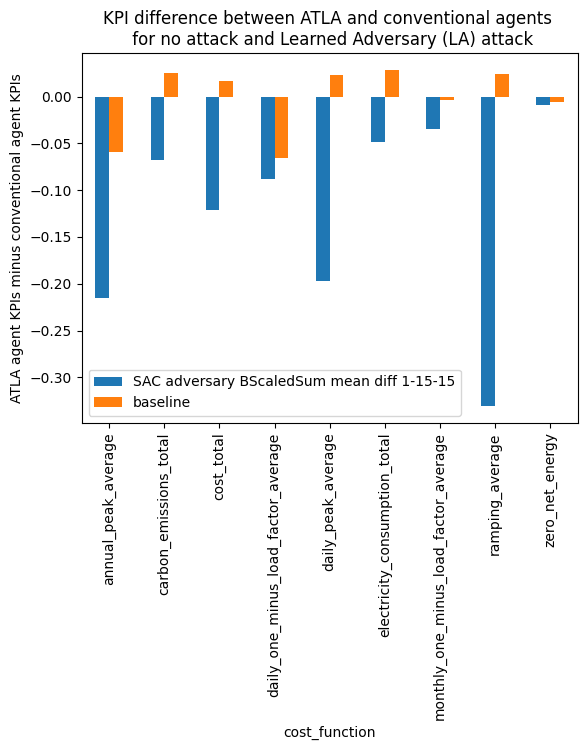

In [8]:
(df_atla[scenarios] - df_bline[scenarios]).plot.bar(
    ylabel=ytext
).set_title('KPI difference between ATLA and conventional agents \n for no attack and Learned Adversary (LA) attack')

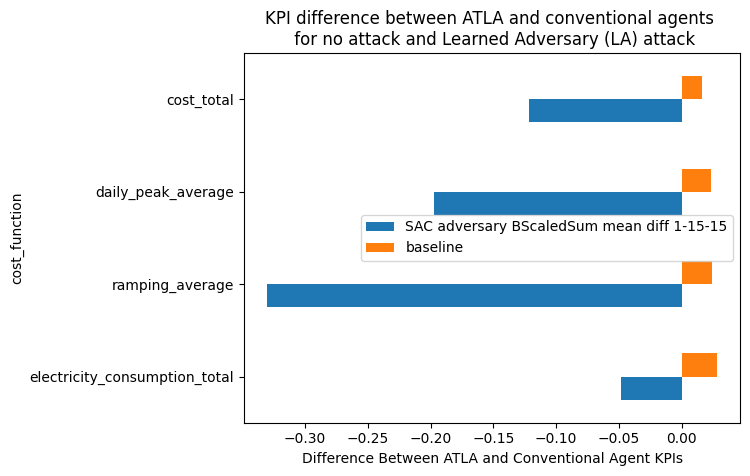

In [20]:
ax = (df_atla[scenarios] - df_bline[scenarios]).loc[key_KPIs].plot.barh(
    title='KPI difference between ATLA and conventional agents \n for no attack and Learned Adversary (LA) attack'
).set_xlabel('Difference Between ATLA and Conventional Agent KPIs')

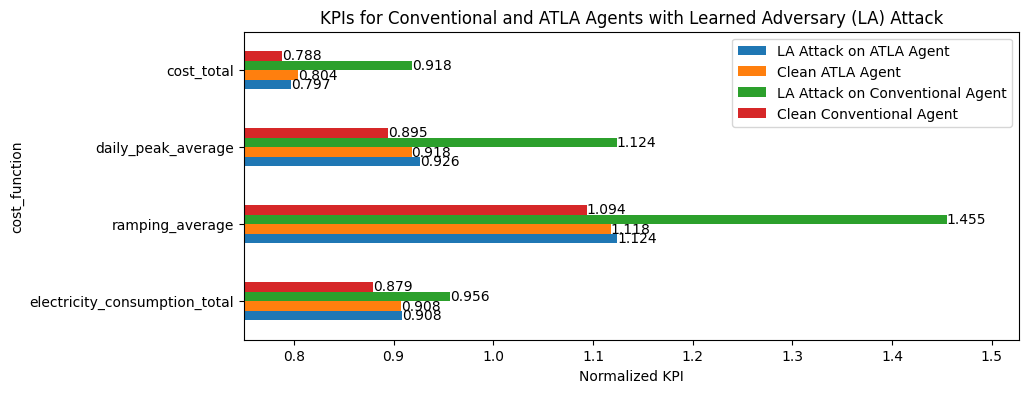

In [31]:
ax = pd.concat([df_atla[scenarios],df_bline[scenarios]], axis='columns').loc[key_KPIs].plot.barh(
    ylabel=ytext,
    title = 'KPIs for Conventional and ATLA Agents with Learned Adversary (LA) Attack',
    xlim=0.75,
    figsize=(10,4),
)
ax.legend(['LA Attack on ATLA Agent','Clean ATLA Agent','LA Attack on Conventional Agent','Clean Conventional Agent' ])
ax.set_xlabel('Normalized KPI')
for container in ax.containers:
    ax.bar_label(container,fmt='%.3f')